In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('dulieuxettuyendaihoc.csv',encoding='utf-8')
df

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,8.6,8.9,7.7,6.7,7.9,6.6,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,3.7,4.1,3.1,3.4,5.5,5.7,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,8.8,9.5,9.5,8.5,9.0,8.5,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,2.7,2.8,6.2,5.2,4.1,4.3,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


In [3]:
# Lấy tên của 2 cột số bất kỳ từ DataFrame gốc
cut_columns = ['T2', 'T3']  # Ví dụ, T2, T3
# Cắt hai cột này từ DataFrame gốc và lưu vào DataFrame mới
df2 = df[cut_columns].copy()
df2

,T2,T3
0,8.4,7.4
1,6.3,4.3
2,5.0,2.8
3,5.1,5.9
4,5.4,7.6
...,...,...
95,8.9,7.7
96,4.1,3.1
97,9.5,9.5
98,2.8,6.2


In [4]:
# Khởi tạo mô hình K-means với số lượng cụm là 2
kmeans = KMeans(n_clusters=2)

# Phân cụm dữ liệu
kmeans.fit(df2)

# Lấy nhãn của các cụm
labels = kmeans.labels_

# Thêm cột 'Cluster' vào data frame để lưu nhãn của các cụm
df2['Cluster'] = labels

In [5]:
df2

,T2,T3,Cluster
0,8.4,7.4,0
1,6.3,4.3,1
2,5.0,2.8,1
3,5.1,5.9,1
4,5.4,7.6,0
...,...,...,...
95,8.9,7.7,0
96,4.1,3.1,1
97,9.5,9.5,0
98,2.8,6.2,1


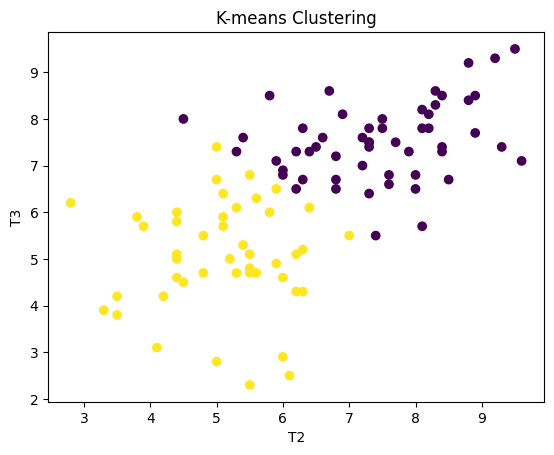

In [6]:
plt.scatter(df2['T2'], df2['T3'], c=labels, cmap='viridis')
plt.xlabel('T2')
plt.ylabel('T3')
plt.title('K-means Clustering')
plt.show()